In [24]:
import pandas as pd
import numpy as np
from trails.optimizer import trans_emiss_calc, post_prob_wrapper
from trails.read_data import maf_parser
from trails.cutpoints import cutpoints_ABC
%load_ext rpy2.ipython

n_int_AB_original = 3
n_int_ABC_original = 3

n_int_AB = 10
n_int_ABC = 10

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [25]:
df = pd.read_csv('chr1_L-BFGS-B.csv')
df = df[df['loglik'] == df['loglik'].max()]
dct = dict(zip(list(df.columns), df.iloc[0].to_list()))

In [26]:
dct

{'n_eval': 252.0,
 't_A': 0.0029307448136187,
 't_B': 0.0030864038918802,
 't_C': 0.005659606389834,
 't_2': 0.0020879423249091,
 't_upper': 0.0049568487930341,
 'N_AB': 0.0034232595068766,
 'N_ABC': 0.002807779932867,
 'r': 0.9920256455623097,
 'loglik': -76112721.76133902,
 'time': 153659.25739312172}

In [27]:
(2/3)*np.exp(-(dct["t_2"])/(dct["N_AB"]))

0.36225994154321695

In [28]:
cut_ABC_original = (cutpoints_ABC(n_int_ABC_original, 1)*dct["N_ABC"])

In [29]:
t_ABC = cut_ABC_original[-2]+dct["t_upper"]
t_ABC

0.008041510331157506

In [30]:
cut_ABC = (cutpoints_ABC(n_int_ABC, 1)*dct["N_ABC"])
cut_ABC_last = cut_ABC[-2]
t_upper = t_ABC-cut_ABC_last
t_upper

0.0015763581133301282

In [31]:
t_out = (((dct["t_A"]+dct["t_B"])/2+dct["t_2"])+dct["t_C"])/2 + cut_ABC_original[n_int_ABC_original-1]*dct["N_ABC"] + dct["t_upper"] + 2*dct["N_ABC"]

In [32]:
new_cut_ABC = cutpoints_ABC(n_int_ABC, 2)
cut_ABC = (new_cut_ABC*dct["N_ABC"])[-2]
t_upper = t_ABC-cut_ABC
t_upper

0.004808934222243817

In [33]:
a, b, pi, hidden_names, observed_names = trans_emiss_calc(
    dct["t_A"], dct["t_B"], dct["t_C"], dct["t_2"], t_upper, t_out, 
    dct["N_AB"], dct["N_ABC"], dct["r"], n_int_AB, n_int_ABC,
    cut_AB = 'standard', cut_ABC = new_cut_ABC
)

/Users/au595587/opt/miniconda3/envs/phasetype/lib/python3.8/site-packages/trails/get_joint_prob_mat.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if cut_ABC == 'standard':
2023-04-21 10:31:42,165	INFO worker.py:1518 -- Started a local Ray instance.
(PoolActor pid=66681) E0421 10:37:14.825600000 123145575985152 chttp2_transport.cc:1103]     Received a GOAWAY with error code ENHANCE_YOUR_CALM and debug data equal to "too_many_pings"
/Users/au595587/opt/miniconda3/envs/phasetype/lib/python3.8/site-packages/trails/get_emission_prob_mat.py:632: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if cut_ABC == 'standard':


In [34]:
if 'obs' not in globals():
    obs = maf_parser('chr1.filtered.region.maf', ['hg38','panTro5','gorGor5','ponAbe2'])

In [35]:
max_idx = np.argmax([len(i) for i in obs])
max_idx

2089

In [36]:
len(obs[max_idx])

143014

In [37]:
max_idx_2 = np.argmax([len(obs[i]) for i in range(len(obs)) if i != max_idx])
max_idx_2

2244

In [38]:
len(obs[max_idx_2])

25813

In [39]:
post_prob = post_prob_wrapper(a, b, pi, [obs[max_idx_2]])

In [40]:
dat = pd.DataFrame(post_prob[0])
dat.columns = [str(i) for i in list(hidden_names.values())]
dat

,"(0, 0, 0)","(0, 0, 1)","(0, 0, 2)","(0, 0, 3)","(0, 0, 4)","(0, 0, 5)","(0, 0, 6)","(0, 0, 7)","(0, 0, 8)","(0, 0, 9)",...,"(3, 6, 6)","(3, 6, 7)","(3, 6, 8)","(3, 6, 9)","(3, 7, 7)","(3, 7, 8)","(3, 7, 9)","(3, 8, 8)","(3, 8, 9)","(3, 9, 9)"
0,0.000670,0.000732,0.000809,0.000909,0.001048,0.001255,0.001591,0.002207,0.003617,0.016023,...,0.000394,0.002259,0.003870,0.016275,0.000598,0.003950,0.016637,0.001104,0.017343,0.007056
1,0.000669,0.000731,0.000808,0.000908,0.001046,0.001252,0.001587,0.002201,0.003607,0.015944,...,0.000395,0.002266,0.003883,0.016298,0.000600,0.003964,0.016665,0.001108,0.017382,0.007070
2,0.000668,0.000730,0.000806,0.000906,0.001044,0.001249,0.001583,0.002196,0.003596,0.015865,...,0.000396,0.002274,0.003896,0.016322,0.000601,0.003978,0.016694,0.001113,0.017421,0.007085
3,0.000667,0.000729,0.000805,0.000904,0.001041,0.001246,0.001579,0.002190,0.003586,0.015786,...,0.000397,0.002281,0.003910,0.016347,0.000603,0.003993,0.016724,0.001117,0.017462,0.007101
4,0.000666,0.000728,0.000803,0.000902,0.001039,0.001243,0.001575,0.002183,0.003575,0.015707,...,0.000398,0.002288,0.003923,0.016371,0.000605,0.004008,0.016754,0.001121,0.017504,0.007117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25808,0.004642,0.004588,0.004519,0.004433,0.004327,0.004200,0.004046,0.003864,0.003656,0.004128,...,0.001501,0.002986,0.002947,0.003451,0.001354,0.002666,0.003060,0.001155,0.002565,0.001038
25809,0.004646,0.004592,0.004522,0.004436,0.004330,0.004202,0.004049,0.003867,0.003659,0.004111,...,0.001509,0.002991,0.002951,0.003440,0.001364,0.002671,0.003055,0.001165,0.002567,0.001052
25810,0.004645,0.004591,0.004521,0.004435,0.004329,0.004202,0.004049,0.003868,0.003662,0.004114,...,0.001517,0.002993,0.002954,0.003440,0.001372,0.002675,0.003057,0.001175,0.002572,0.001068
25811,0.004645,0.004590,0.004521,0.004434,0.004329,0.004202,0.004049,0.003869,0.003665,0.004116,...,0.001525,0.002996,0.002957,0.003439,0.001381,0.002679,0.003060,0.001185,0.002578,0.001084


In [43]:
%%R -i dat -i n_int_AB -i n_int_ABC

library(tidyverse)
library(ggthemes)

if (file.exists(paste0('./cutpoints/tab_', n_int_AB, '_', n_int_ABC, '.csv'))) {
    y_tab <- read_csv(paste0('./cutpoints/tab_', n_int_AB, '_', n_int_ABC, '.csv'))
} else {
    y_tab <- as_tibble(dat) %>%
        mutate(pos = 1:n()) %>%
        pivot_longer(-pos) %>%
        mutate(
            name = str_remove_all(name, '\\('),
            name = str_remove_all(name, '\\)')
        ) %>%
        separate(name, c('V', 't1', 't2'), ', ') %>%
        mutate(
            V = as.integer(V),
            t1 = as.integer(t1),
            t2 = as.integer(t2),
            is_V0 = V == 0
        ) 
    write_csv(y_tab, paste0('./cutpoints/tab_', n_int_AB, '_', n_int_ABC, '.csv'))
}

Rows: 6840445 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): pos, V, t1, t2, value
lgl (1): is_V0

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [68]:
%%R

v_post_plt <- y_tab %>% 
    # filter(between(pos, lo, up)) %>%
    group_by(pos, V) %>% 
    summarize(value = sum(value)) %>% 
    ggplot() +
    geom_tile(aes(pos, V, fill = value, color = value),
             color = NA) +
    theme_few() +
    scale_fill_viridis_c(name = 'Posterior\nprobability', 
                         # limits = c(0, 1)
                         option="inferno"
                        ) +
    scale_color_viridis_c(name = 'Posterior\nprobability', 
                         # limits = c(0, 1)
                          option="inferno"
                         ) +
    scale_y_continuous(
        breaks = c(0, 1, 2, 3), 
        labels = c('V0', 'V1', 'V2', 'V3'),
        expand = c(0, 0),
        sec.axis = dup_axis()
    ) +
    scale_x_continuous(expand = c(0, 0)) +
    ylab('Topology') +
    xlab('Position') +
    theme(
        axis.title.y.right = element_blank()
    )

`summarise()` has grouped output by 'pos'. You can override using the `.groups` argument.


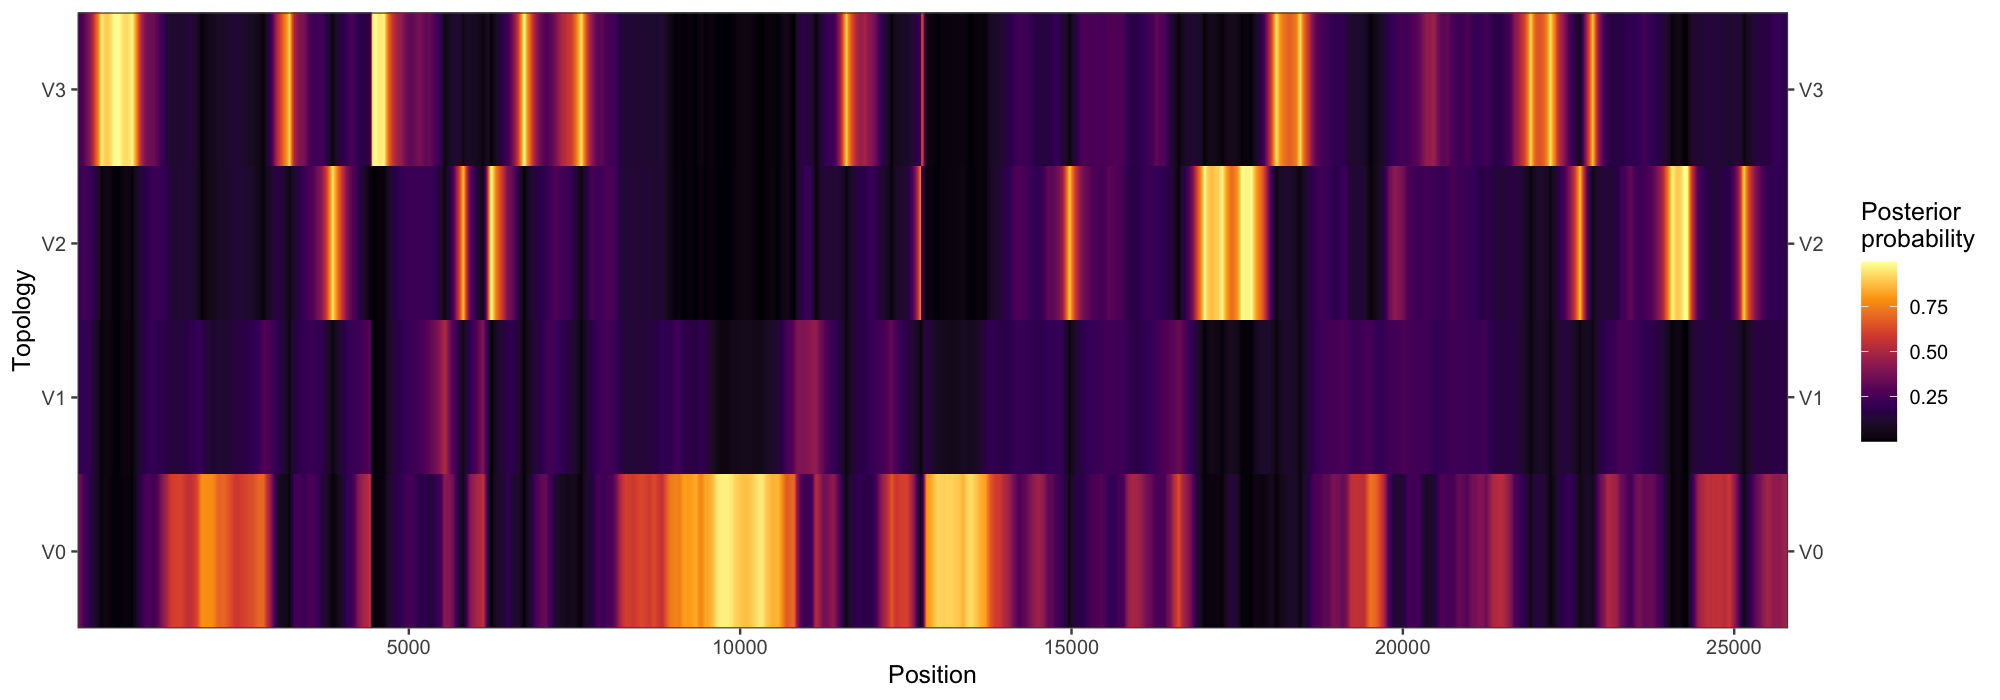

In [69]:
%%R -w 2000 -h 700 -r 150
    
v_post_plt

In [46]:
%%R

ggsave(paste0('./cutpoints/v_post_plt_', n_int_AB, '_', n_int_ABC, '.pdf'), 
       v_post_plt, width = 12, height = 4)

In [62]:
%%R 

t1_post_plt <- y_tab %>% 
    group_by(pos, is_V0, t1) %>% 
    summarize(value = sum(value)) %>% 
    ggplot() +
    geom_tile(aes(pos, t1+(!is_V0)*(n_int_AB), fill = value, color = value),
             color = NA) +
    geom_hline(aes(yintercept = n_int_AB-1+0.5), color = 'white') +
    theme_few() +
    scale_fill_viridis_c(name = 'Posterior\nprobability', 
                         # limits = c(0, 1)
                         option="inferno"
                        ) +
    scale_color_viridis_c(name = 'Posterior\nprobability', 
                         # limits = c(0, 1)
                          option="inferno"
                         ) +
    ylab('Interval of first coalescent') +
    xlab('Position') +
    scale_y_continuous(
        breaks = c(0:(n_int_AB-1), ((n_int_AB):(n_int_AB+n_int_ABC-1))), 
        labels = paste0('F', c(0:(n_int_AB+n_int_ABC-1))),
        expand = c(0, 0),
        sec.axis = dup_axis()
    ) +
    scale_x_continuous(expand = c(0, 0)) +
    theme(
        axis.title.y.right = element_blank()
    )

`summarise()` has grouped output by 'pos', 'is_V0'. You can override using the `.groups` argument.


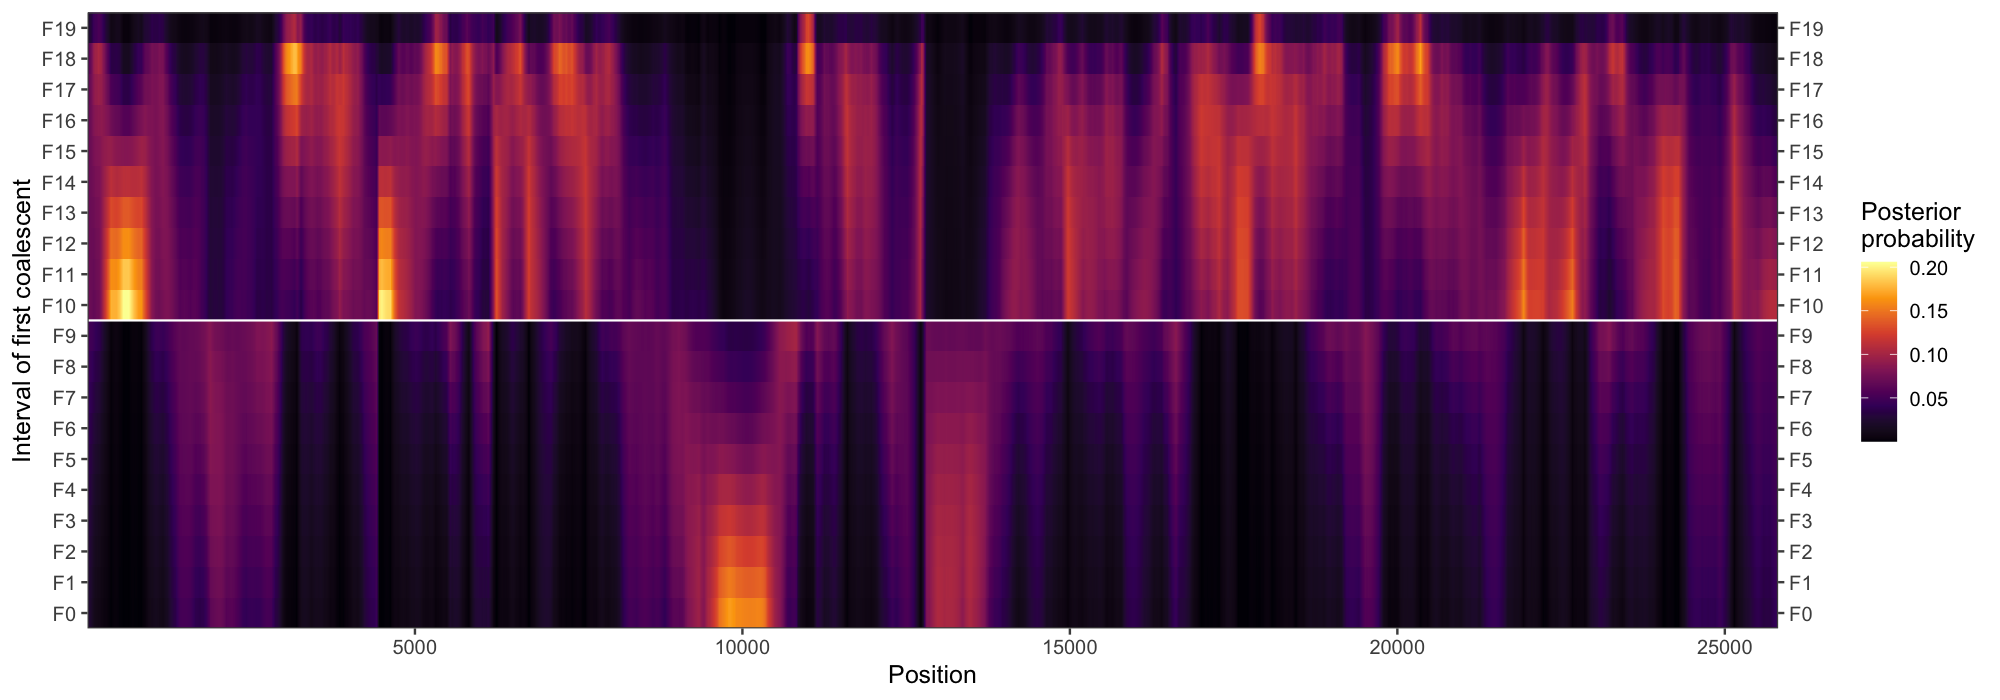

In [63]:
%%R -w 2000 -h 700 -r 150

t1_post_plt

In [64]:
%%R

ggsave(paste0('./cutpoints/t1_post_plt_', n_int_AB, '_', n_int_ABC, '.pdf'), 
       t1_post_plt, width = 12, height = 4)

In [65]:
%%R

t2_post_plt <- y_tab %>% 
    # filter(between(pos, lo, up)) %>%
    group_by(pos, t2) %>% 
    summarize(value = sum(value)) %>% 
    ggplot() +
    geom_tile(aes(pos, t2, fill = value, color = value),
             color = NA) +
    theme_few() +
    scale_fill_viridis_c(name = 'Posterior\nprobability', 
                         # limits = c(0, 1)
                         option="inferno"
                        ) +
    scale_color_viridis_c(name = 'Posterior\nprobability', 
                         # limits = c(0, 1)
                          option="inferno"
                         ) +
    ylab('Interval of second coalescent') +
    xlab('Position') +
    scale_y_continuous(
        breaks = 0:(n_int_ABC-1), 
        labels = paste0('S', 0:(n_int_ABC-1)),
        expand = c(0, 0),
        sec.axis = dup_axis()
    ) +
    scale_x_continuous(expand = c(0, 0)) +
    theme(
        axis.title.y.right = element_blank()
    )

`summarise()` has grouped output by 'pos'. You can override using the `.groups` argument.


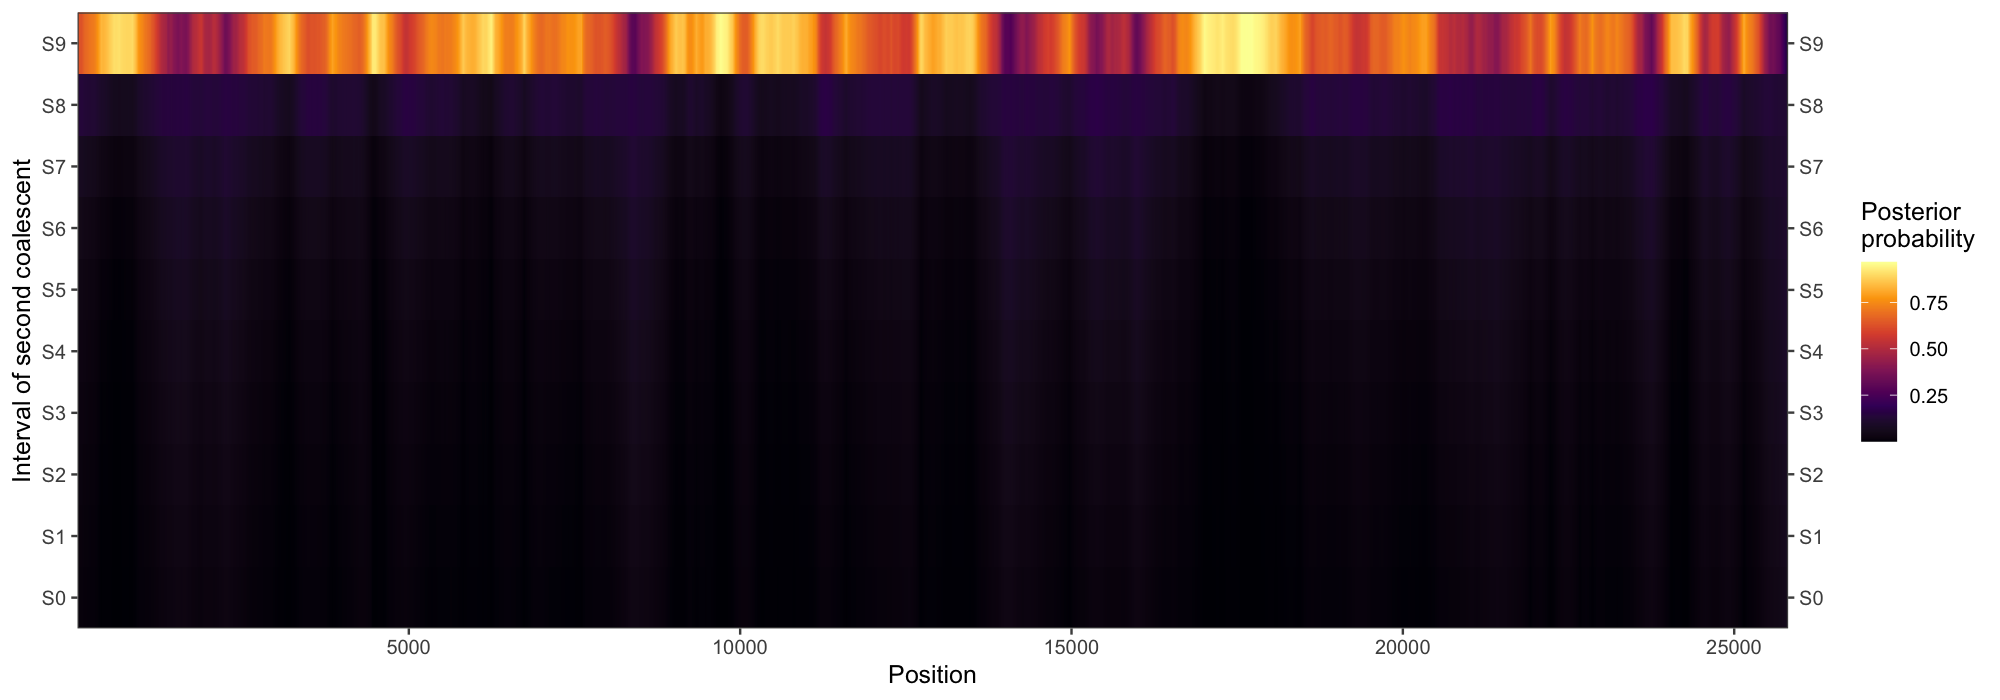

In [66]:
%%R -w 2000 -h 700 -r 150

t2_post_plt

In [67]:
%%R

ggsave(paste0('./cutpoints/t2_post_plt_', n_int_AB, '_', n_int_ABC, '.pdf'), 
       t2_post_plt, width = 12, height = 4)

In [73]:
%%R

library(patchwork)

plt_tot <- (v_post_plt/t2_post_plt/t1_post_plt + 
  plot_layout(heights = c(4, n_int_ABC, n_int_AB+n_int_ABC))) 

ggsave(paste0('./cutpoints/posterior_decoding_', n_int_AB, '_', n_int_ABC, 
              '_combined.tiff'), plt_tot, width = 14, height = 9)

In [53]:
%%R

y_tab %>%
    group_by(pos) %>%
    filter(value == max(value)) %>%
    group_by(V) %>%
    summarize(
        n = n(),
        med = median(value),
        mea = mean(value)
    ) %>%
    ungroup() %>%
    mutate(
        ILS = (n[V==2]+n[V==3])/sum(n)
    )

# A tibble: 4 × 5
      V     n    med    mea   ILS
  <dbl> <int>  <dbl>  <dbl> <dbl>
1     0 11828 0.0377 0.0473 0.515
2     1   704 0.0617 0.0574 0.515
3     2  5578 0.0556 0.0608 0.515
4     3  7703 0.0543 0.0630 0.515


In [54]:
%%R

y_tab %>%
    group_by(pos) %>%
    filter(value == max(value)) %>%
    group_by(t2) %>%
    summarize(
        n = n(),
        med = median(value),
        mea = mean(value)
    )

# A tibble: 2 × 4
     t2     n     med     mea
  <dbl> <int>   <dbl>   <dbl>
1     0    35 0.00603 0.00602
2     9 25778 0.0452  0.0552 


In [55]:
%%R

y_tab %>%
    group_by(pos) %>%
    filter(value == max(value)) %>%
    group_by(is_V0, t1) %>%
    summarize(
        n = n(),
        med = median(value),
        mea = mean(value)
    )

`summarise()` has grouped output by 'is_V0'. You can override using the `.groups` argument.
# A tibble: 19 × 5
# Groups:   is_V0 [2]
   is_V0    t1     n    med    mea
   <lgl> <dbl> <int>  <dbl>  <dbl>
 1 FALSE     0  2923 0.0701 0.0840
 2 FALSE     1   299 0.0762 0.0752
 3 FALSE     2   652 0.0717 0.0696
 4 FALSE     3   734 0.0627 0.0600
 5 FALSE     4   505 0.0706 0.0650
 6 FALSE     5   725 0.0630 0.0601
 7 FALSE     6  1425 0.0638 0.0626
 8 FALSE     7  1387 0.0556 0.0553
 9 FALSE     8  5335 0.0439 0.0496
10 TRUE      0  1076 0.113  0.116 
11 TRUE      1   352 0.0862 0.0848
12 TRUE      2   358 0.0837 0.0798
13 TRUE      3   366 0.0688 0.0711
14 TRUE      4   122 0.0636 0.0632
15 TRUE      5    64 0.0576 0.0627
16 TRUE      6   452 0.0295 0.0323
17 TRUE      7   384 0.0379 0.0434
18 TRUE      8   561 0.0279 0.0325
19 TRUE      9  8093 0.0336 0.0358
